<a href="https://colab.research.google.com/github/abrahamrichardbudul/Machine-Learning-and-Visualization-for-Data-/blob/main/TB__Machine_Learning_Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocessing**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_excel("TB Data.xlsx", sheet_name="Sheet1")

# Corrected list of features and target
features = [
    'Estimated total population number',
    'Estimated prevalence of TB (all forms) per 100 000 population',
    'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
    'Estimated incidence of TB cases who are HIV-positive per 100 000 population',
    'Case detection rate (all forms), percent',
    'Region'
]

target = 'Estimated incidence (all forms) per 100 000 population'

# Drop missing values
df_cleaned = df[features + [target]].dropna()

# Encode 'Region' (categorical) into numeric
le = LabelEncoder()
df_cleaned['Region'] = le.fit_transform(df_cleaned['Region'])

# Prepare features and target
X = df_cleaned[features]
y = df_cleaned[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shape of datasets
print("Preprocessing Complete:")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Preprocessing Complete:
Training data shape: (490, 6)
Testing data shape: (123, 6)


# Train and Evaluate the **Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Model Evaluation Metrics:")
print(f" RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f" MAE (Mean Absolute Error): {mae:.2f}")
print(f" R² Score: {r2:.2f}")


 Model Evaluation Metrics:
 RMSE (Root Mean Squared Error): 19.72
 MAE (Mean Absolute Error): 8.34
 R² Score: 0.98


# Visualize Feature **Importance**

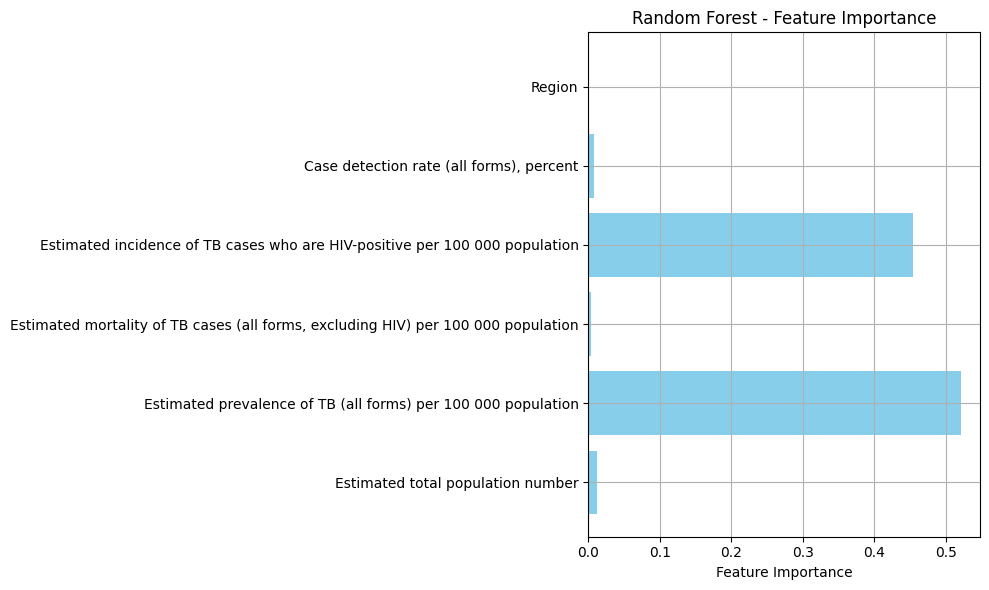

In [ ]:
import matplotlib.pyplot as plt

# Feature importances
importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(10,6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importance")
plt.grid(True)
plt.tight_layout()
plt.show()


# Export Predictions for **Tableau**

In [ ]:
# Create a DataFrame for export
results_df = X_test.copy()
results_df['Actual Incidence'] = y_test.values
results_df['Predicted Incidence'] = y_pred

# Decode the Region back to original labels
results_df['Region'] = results_df['Region'].apply(lambda x: le.inverse_transform([int(x)])[0])

# Save to Excel and CSV
results_df.to_excel("TB_Predictions.xlsx", index=False)
results_df.to_csv("TB_Predictions.csv", index=False)

print("Predictions saved as 'TB_Predictions.xlsx' and 'TB_Predictions.csv'")


Predictions saved as 'TB_Predictions.xlsx' and 'TB_Predictions.csv'
